In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.nn_impl import normalize

Підключення датасету MNIST та додавання класу

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Попередня обробка 

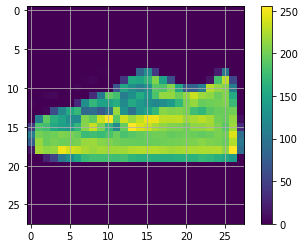

In [ ]:
plt.figure(0)
plt.imshow(train_images[108])
plt.colorbar()
plt.grid(True)
plt.show()

Масштабування від 0 до 1. Навчальна і перевірна вибірки повинні бути попередньо оброблені однаково

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Нормалізація

In [ ]:
tf.keras.layers.Normalization(axis=-1,mean=None, variance=None, invert=True,)

In [ ]:
from keras.utils.conv_utils import normalize_data_format
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt 


<bound method Normalization.adapt of <keras.layers.preprocessing.normalization.Normalization object at 0x7f7c5abb4760>>

Налаштування шарів

In [ ]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Компіляція моделі (перший спосіб)



In [ ]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Тренування моделі

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5240 - accuracy: 0.8206
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4032 - accuracy: 0.8576
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3616 - accuracy: 0.8720
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3400 - accuracy: 0.8777
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3206 - accuracy: 0.8850


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3621 - accuracy: 0.8715 - 952ms/epoch - 3ms/step

Test accuracy: 0.8715000152587891


Викорстання моделі для передбачення на тестовому наборі




In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([0.08647461, 0.08647338, 0.0864749 , 0.08647378, 0.08647551,
       0.09108779, 0.0864767 , 0.09009521, 0.08692722, 0.2130408 ],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

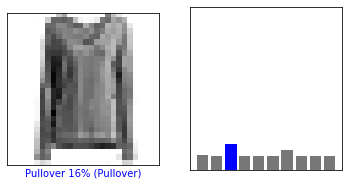

In [ ]:
i = 103

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Використання навчаної моделі

In [ ]:
img = test_images[103]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 33ms/step
[[4.9979161e-02 8.7487267e-04 5.9697163e-01 7.2825588e-03 1.6962996e-02
  8.1268922e-07 3.2486480e-01 8.4013800e-07 3.0619968e-03 2.5077065e-07]]


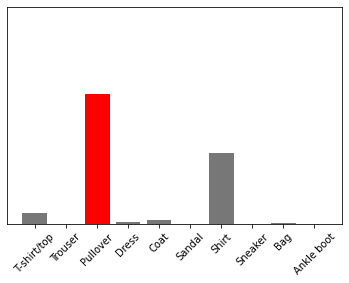

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

⏬

⏬

⏬

⏬

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.nn_impl import normalize
from tensorflow.keras import regularizers
from  IPython import display
from matplotlib import pyplot as plt
import numpy as np
import pathlib
import shutil
import tempfile
import matplotlib.pyplot as plt

Підключення датасету MNIST та додавання класу

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Масштабування від 0 до 1. Навчальна і перевірна вибірки повинні бути попередньо оброблені однаково

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Налаштування оптимізатора Адам

In [ ]:
tf.keras.optimizers.Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam'
)

Валідація

In [ ]:
train_images_val = train_images[-10000:]

Нормалізація

In [ ]:
tf.keras.layers.Normalization(axis=-1,mean=None, variance=None, invert=True,)

In [ ]:
from keras.utils.conv_utils import normalize_data_format
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt 


<bound method Normalization.adapt of <keras.layers.preprocessing.normalization.Normalization object at 0x7f74dbfdbf70>>

Налаштування шарів

In [ ]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Налаштування шарів (Другий варіант)
Dropout - запобігання перенавчання

In [ ]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Налаштування шарів (Третій варіант)
Комбанований спосіб - запобігання перенавчання

In [ ]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='elu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='elu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Визначення learning_rate

In [ ]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

initial_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
 
initial_history = model.fit(train_images, train_labels, epochs=10, callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 10))])

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6301 - accuracy: 0.8272 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6359 - accuracy: 0.8252 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6375 - accuracy: 0.8256 - lr: 0.0012
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6522 - accuracy: 0.8209 - lr: 0.0013
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6598 - accuracy: 0.8209 - lr: 0.0014
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6762 - accuracy: 0.8164 - lr: 0.0015
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6868 - accuracy: 0.8133 - lr: 0.0016
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6980 - accuracy: 0.8099 - lr: 0.0017
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - l

Компіляція моделі (перший спосіб)



In [ ]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Компіляція моделі (другий спосіб)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam (),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Компіляція моделі (третій спосіб) зі вказанням learning_rate

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam (learning_rate=0.0010),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Тренування моделі (другий спосіб)
Збереження моделі HDF5

In [ ]:
model.fit(train_images, train_labels, validation_split=0.2, epochs=20)
model.save('my_model.h5')

Epoch 1/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.8226 - accuracy: 0.7234 - val_loss: 0.6426 - val_accuracy: 0.7947
Epoch 2/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.8134 - accuracy: 0.7266 - val_loss: 0.6584 - val_accuracy: 0.7920
Epoch 3/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.8086 - accuracy: 0.7284 - val_loss: 0.6661 - val_accuracy: 0.7883
Epoch 4/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.8142 - accuracy: 0.7280 - val_loss: 0.6483 - val_accuracy: 0.7881
Epoch 5/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.8070 - accuracy: 0.7276 - val_loss: 0.6382 - val_accuracy: 0.7973
Epoch 6/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.8061 - accuracy: 0.7280 - val_loss: 0.6512 - val_accuracy: 0.7939
Epoch 7/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.8064 - accuracy: 0.7275 - val_loss: 0.6391 - val_

In [ ]:
model = tf.keras.models.load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (32, 28, 28)             57        
 ion)                                                            
                                                                 
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dropout (Dropout)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 256)                 200960    
                                                                 
 dropout_1 (Dropout)         (32, 256)                 0         
                                                                 
 dense_1 (Dense)             (32, 128)                 32896     
                                                        

Тренування моделі (третій спосіб)
Збереження моделі 

In [ ]:
model.fit(train_images, train_labels, validation_split=0.2, epochs=5)
!mkdir -p saved_model
model.save('saved_model/my_model')

Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.6252 - accuracy: 0.8285 - val_loss: 0.5661 - val_accuracy: 0.8456
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.6234 - accuracy: 0.8289 - val_loss: 0.5632 - val_accuracy: 0.8429
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.6220 - accuracy: 0.8287 - val_loss: 0.5456 - val_accuracy: 0.8568
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.6182 - accuracy: 0.8305 - val_loss: 0.5705 - val_accuracy: 0.8395
Epoch 5/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.6171 - accuracy: 0.8293 - val_loss: 0.5208 - val_accuracy: 0.8612


Тренування моделі (четвертий спосіб) збереження чекпоінтів

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])

Epoch 1/10
1870/1875 [============================>.] - ETA: 0s - loss: 1.0371 - accuracy: 0.7586
Epoch 1: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 20s 9ms/step - loss: 1.0363 - accuracy: 0.7587 - val_loss: 0.7004 - val_accuracy: 0.8266
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.7310 - accuracy: 0.8117
Epoch 2: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7309 - accuracy: 0.8117 - val_loss: 0.6177 - val_accuracy: 0.8403
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6771 - accuracy: 0.8192
Epoch 3: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6771 - accuracy: 0.8192 - val_loss: 0.5949 - val_accuracy: 0.8427
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6586 - accuracy: 0.8226
Epoch 4: saving model to training_1/cp.ckpt
1875/1875 [===================

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5665 - accuracy: 0.8470 - 858ms/epoch - 3ms/step

Test accuracy: 0.847000002861023


Викорстання моделі для передбачення на тестовому наборі




In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([0.08747412, 0.08748708, 0.08749352, 0.08747748, 0.08747018,
       0.09157466, 0.08748026, 0.10248635, 0.08749229, 0.19356407],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

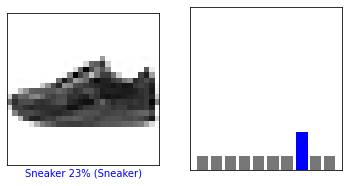

In [ ]:
i = 104


plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Використання навчаної моделі

In [ ]:
img = test_images[10]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 27ms/step
[[1.0111406e-03 1.6744799e-04 2.2386762e-01 1.4500726e-03 5.6345826e-01
  1.0037407e-07 2.0839745e-01 3.1680955e-07 1.6475020e-03 5.9719333e-08]]


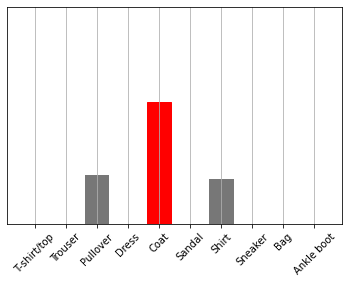

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)